**Introduction**

Consider the non-dimensionalized time-dependent Schrodinger equation (TDSE):

$\displaystyle i \partial_t \psi = \mathcal{H} \psi$.

In this notebook, we work in one spatial dimension, so the kinetic operator is

$\displaystyle \mathcal{K} = -\frac{1}{2} \partial_{xx}$.

In real space, the potential operator $\mathcal{V}$ works like this:

$\displaystyle (\mathcal{V} \psi)(x,t) = v(x) \psi(x,t)$,

where $v(x)$ is a real potential energy function.

The Hamiltonian is $\mathcal{H} = \mathcal{K} + \mathcal{V}$.  Clearly $\mathcal{H}$ is self-adjoint or Hermitian.

**Forward problem**

In the forward problem, $V$ and $\psi(x,0)$ are specified and the task is to solve for $\psi(x,t)$ for $t > 0$.

We will do this numerically through a basis function method.  Our spatial domain is the closed interval $[-a,a]$.

Let $\{ \phi_n(x) \}_{n=-\infty}^\infty$ be a collection of basis functions.  We take these functions to be elements of the Hilbert space $L^2([-a,a]; \mathbb{C})$.  This Hilbert space consists of complex-valued, square-integrable functions with domain $[-a,a]$.  The inner product in this space is

$\displaystyle (f, g) = \int_{x=-a}^a \overline{f(x)} g(x) \, dx$,

and therefore the norm is

$\displaystyle \| f \| = (f, f)^{1/2} = \left( \int_{x=-a}^a |f(x)|^2 \, dx \right)^{1/2}$.

We assume the basis is $orthonormal$ and $complete$ in $L^2([-a,a]; \mathbb{C})$.  Orthonormality means that

$\displaystyle (\phi_m, \phi_n) = \delta_{mn} = \begin{cases} 1 & m = n \\ 0 & m \neq n. \end{cases}$

Completeness means that for any function $f \in L^2([-a,a]; \mathbb{C})$, there exists an infinite sequence of coefficients $\{ \alpha_n \}_{n=-\infty}^\infty$ such that when we form the expansion

$\displaystyle g_N(x) = \sum_{n=-N}^N \alpha_n \phi_n(x)$,

the expansion $converges$ to $f$ as $N \to \infty$, i.e., $\lim_{N \to \infty} \| f - g_N \| = 0$.  Or, to put it another way, we can represent any $f$ (in our Hilbert space) arbitrarily well by expanding $f$ as a linear combination of basis functions.

Using this complete, orthonormal basis, we can represent the kinetic and potential operators as matrices:

$\displaystyle K_{mn} = (\phi_m, \mathcal{K} \phi_n) = \int_{x=-a}^a \overline{\phi_m(x)} (\mathcal{K} \phi_n)(x) \, dx = -\frac{1}{2} \int_{x=-a}^a \overline{\phi_m(x)} \partial_{xx} \phi_n(x) \, dx$

Note that if we wanted to we could write

$\displaystyle K_{mn} = -\frac{1}{2} \overline{\phi_m(x)} \partial_x \phi_n(x) \, dx \biggr|_{x=-a}^{a} + \frac{1}{2} \int_{x=-a}^a \partial_{x} \overline{\phi_m(x)} \partial_{x} \phi_n(x) \, dx$,

which shows that if the boundary term vanishes, $K$ must be a Hermitian matrix.

$\displaystyle V_{mn} = (\phi_m, \mathcal{V} \phi_n) = \int_{x=-a}^a \overline{\phi_m(x)} (\mathcal{V} \phi_n)(x) \, dx = \int_{x=-a}^a \overline{\phi_m(x)} v(x) \phi_n(x) \, dx$

In this notebook, we will consider an orthonormal basis that *diagonalizes* the kinetic operator.  This basis is the Fourier basis in complex exponential form:

$\phi_n(x) = (2 a)^{-1/2} e^{i \pi n x/a}$.

We can check that, for integers $n$ and $m$ such that $n \neq m$,

$\displaystyle (\phi_m, \phi_n) = \frac{1}{2a} \int_{x=-a}^a e^{i \pi (n-m) x/a} \, dx = \frac{1}{2a} \frac{a}{i \pi (n-m)} \left( e^{i \pi (n-m)} - e^{-i \pi (n-m)} \right) = 0$.

For integer $n$, it is clear that $(\phi_n, \phi_n) = 1$, completing our check of orthonormality.

Completeness follows from the Riesz-Fischer theorem.

Now we see that for the kinetic operator,

$\displaystyle (\mathcal{K} \phi_n)(x) = \frac{ \pi^2 n^2 }{ 2 a^2 } \phi_n(x) $.

Hence by orthonormality,

$\displaystyle K_{mn} = (\phi_m, \mathcal{K} \phi_m) = \frac{ \pi^2 n^2 }{ 2 a^2 } \delta_{mn} $,

implying that $K$ is a diagonal matrix.  As for the potential operator $\mathcal{V}$, we see that

$\displaystyle V_{mn} = \frac{1}{2a} \int_{x=-a}^a e^{i \pi (n-m) x/a} v(x) \, dx$.

Clearly $V_{mn}$ is constant for all $(m,n)$ such that $n-m$ is constant.  This means that the matrix $V$ is Toeplitz, i.e., constant along diagonals.  Additionally, we see that $V_{mn}$ is equivalent to a *Fourier series coefficient* of the function $v(x)$.  We can compute this coefficient using the FFT.

**Quick points on potentials, symmetry, and periodicity**

What happens for an *even* or *symmetric* potential $v(x)$?  We start with

$\displaystyle \theta_{-j} = (2a)^{-1/2} \int_{x=-a}^a e^{i \pi j x/a} v(x) \, dx$,

and make the substitution $x = -z$ in this integral.  Chasing down all the minus signs, we obtain

$\displaystyle \theta_{-j} = (2a)^{-1/2} \int_{z=a}^{-a} e^{-i \pi j z/a} v(-z) \, (-dz)$.

We use the minus sign from $-dz$ to flip the limits of integration, and we use $v(-z) = v(z)$.  Then we obtain

$\displaystyle \theta_{-j} = (2a)^{-1/2} \int_{z=-a}^{a} e^{-i \pi j z/a} v(z) \, dz$ = \theta_j$.

Hence $\theta_j = \overline{\theta_j}$.  We have shown that for an *even* potential $v(x)$, the Fourier coefficients will be real.

Something we have not yet discussed is periodicity.  We write our potential function as

$\displaystyle v(x) = \sum_{j=-2N}^{j=2N} \theta_j \phi_j(x)$.

By virtue of the Fourier basis we have chosen, this potential function will be periodic with period $2a$ on the interval $[-a,a]$.  This is because, for all $j$, we have

$\displaystyle \phi_n(x + 2a) = (2 a)^{-1/2} e^{i \pi n (x+2a)/a} =  (2 a)^{-1/2} e^{i \pi n x/a} e^{2 \pi i n} = \phi_n(x)$.

The same is true for $\psi(x,t)$; it will also be $2a$-periodic on $[-a,a]$.

We justify this based on the principle that if we choose $a$ sufficiently large, and if our initial wave function is localized in space near $x=0$, then the wave function's magnitude will decay (as a function of spatial coordinate x) to be close to zero near the boundaries $x= \pm a$.  Hence the behavior of the potential beyond the boundaries $x = \pm a$ is of no practical concern to us.

When we generate data using our forward method, we must monitor our wave function and check that during the time interval of interest, its magnitude stays close to zero near the boundaries.  If this isn't true, we need to rerun the simulation with larger $a$.


In [1]:
from numba import jit

import numpy as np
import scipy.linalg as sl
import scipy.integrate as si
import scipy.optimize
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import time

In [2]:
# our Fourier representation will use basis functions from n = -nmax to n = nmax
nmax = 8

# size of spatial domain
a = 16

In [3]:
# symmetric double well potential just for fun
def v(x):
    return 0.25*(x**2 - 25)**2

In [4]:
# some sampling and FFT tricks
# this integer '100' can be adjusted to improve resolution
# if we set f_sample = 2*nmax, then we are sampling at the Nyquist frequency
f_sample = 100 * 2 * nmax
t, dt = np.linspace(-a, a, f_sample+2, endpoint=False, retstep=True)
y = (np.fft.rfft(v(t)) / t.size)[:(2*nmax+1)]

# this stores the Fourier series coefficients for n-m=0 to n-m=2*nmax
vrow = y * (-1)**np.arange(2*nmax+1)

# # if you want to use quadrature instead of the FFT:
# vraw = np.zeros(2*nmax+1, dtype=np.complex128)
# for thisn in range(2*nmax+1):
#     def integ(x):
#         return (2*a)**(-1)*np.exp(-1j*np.pi*thisn*x/a)*v(x)
#     def rinteg(x):
#         return np.real(integ(x))
#     def iinteg(x):
#         return np.imag(integ(x))
#     vraw[thisn] = si.quad(rinteg, a=-a, b=a)[0] + 1j*si.quad(iinteg, a=-a, b=a)[0]

# vrow = np.copy(vraw)

# create Toeplitz matrix
vmat = sl.toeplitz(r=vrow,c=np.conj(vrow))

# kinetic matrix
kmat = np.diag( np.arange(-nmax,nmax+1)**2 * np.pi**2 / (2*a**2) )

# Hamiltonian matrix 
hmat = kmat + vmat

# check whether Hamiltonian is Hermitian
print(np.linalg.norm( hmat - np.conj(hmat.T) ))

# eigendecomposition
spec, states = np.linalg.eigh(hmat)

# check whether this diagonalizes hmat
# note that if this is close to zero it means that
# hmat = states @ np.diag(spec) @ np.conj(states).T
np.linalg.norm( hmat @ states - states @ np.diag(spec) )

# check whether we have a unitary matrix
print(np.linalg.norm( states @ np.conj(states).T - np.eye(2*nmax+1) ))

0.0
4.057393039453741e-15


In [5]:
# find indices that sort eigenvalues
ordering = np.argsort(spec)

# spatial grid for the purposes of plotting
xvec = np.linspace(-a, a, 1025)

# convert basis coefficients into wavefunction on grid by matrix multiplication
nvec = np.arange(-nmax,nmax+1)
convmat = np.exp(1j*np.pi*np.outer(nvec, xvec)/a)/np.sqrt(2*a)

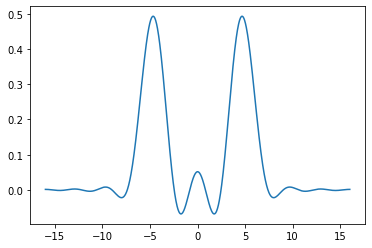

1.0000000580005746


In [6]:
# pick out and plot ground state
groundstate = ordering[0]
wavefn = states[:,groundstate] @ convmat
plt.plot(xvec, -np.real(wavefn))
plt.show()

# check normalization
print(np.sum(np.abs(wavefn)**2 * (xvec[1]-xvec[0])))

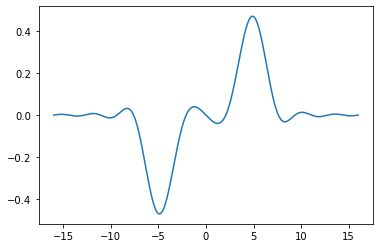

0.9999999999999996


In [7]:
# pick out and plot j-th state with j starting at 0
wavefn = states[:,ordering[1]] @ convmat
plt.plot(xvec, np.imag(wavefn))
plt.show()

# check normalization
print(np.sum(np.abs(wavefn)**2 * (xvec[1]-xvec[0])))

**Dynamics**

We've solved the spatial part of the forward problem.  To solve the forward problem in both space and time, we must think about dynamics.  To start, we represent the TDSE and the wave function in the orthonormal basis given above:

$\displaystyle \psi(x,t) = \sum_{n=-N}^N a_n(t) \phi_n(x)$.

By orthonormality,

$(\phi_m, \psi) = a_m(t)$.

Multiplying by $i$ and taking a time-derivative on both sides, we obtain

$\displaystyle (\phi_m, i \partial_t \psi) = i \frac{d}{dt} a_m(t)$.

Now we substitute the TDSE and our representation of the wave function into the left-hand side and obtain

$\displaystyle \sum_{n=-N}^N (\phi_m, \mathcal{H} \phi_n) a_n(t) = i \frac{d}{dt} a_m(t)$.

Rearranging, we see that

$\displaystyle \frac{d}{dt} \vec{a}(t) = -i H \vec{a}(t)$,

where $\vec{a}(t)$ is the vector of all coefficients $\{a_n(t)\}_{n=-N}^N$, and $H$ is the matrix representation of the Hamiltonian operator $\mathcal{H}$.  The latter statement is equivalent to saying that $H_{mn} = (\phi_m, \mathcal{H} \phi_n)$.

We have an ordinary differential equation (ODE) for the coefficients $\vec{a}(t)$.  I think of this ODE as the representation of the TDSE in the orthonormal basis we chose.  Solving this ODE will give us the dynamics of the coefficient vector $\vec{a}(t)$.  If we know the coefficient vector $\vec{a}(t)$ at some $t > 0$, then using the first equation above, we can compute $\psi(x,t)$ at each $x \in [-a,a]$.

Let $\{t_n\}$ denote a temporal grid with $t_n = n \Delta t$.  Using the ODE and properties of the matrix exponential, we derive

$\vec{a}(t_{n+1}) = \exp(-i H \Delta t) \vec{a}(t_n)$.

If we have already diagonalized the Hamiltonian $H$ via $H = V D V^\dagger$, then we can rewrite the previous equation as

$\vec{a}(t_{n+1}) = V \exp(-i D \Delta t) V^\dagger \vec{a}(t_n)$.

So, operationally speaking, here is what we do.  Given an initial condition $\psi(x,0)$, we find the initial coefficient vector via

$\displaystyle a_m(0) = (\phi_m, \psi(\cdot, 0)) = (2a)^{-1/2} \int_{x=-a}^a e^{-i \pi m x/a} \psi(x,0) \, dx$.

We can do this via the FFT again; however, this doesn't lead to accurate reconstructions.  Below we use quadrature instead.

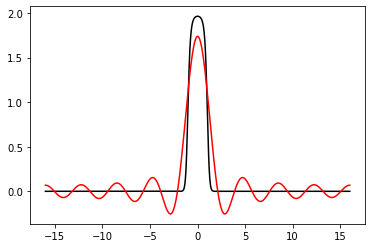

In [8]:
# triangular pulse
# def psi0(x):
#     return np.piecewise(x, [x < -1, (x >= -1) & (x <= 1), x > 1], [0, lambda x: (1 - np.abs(x)), 0])

# parabolic pulse
# def psi0(x):
#     return np.piecewise(x, [x < -1, (x >= -1) & (x <= 1), x > 1], [0, lambda x: (1 - x**2), 0])

# hyperbolic secant squared
# def psi0(x):
#     return (np.cosh(x))**(-2)

# Laplace
# def psi0(x):
#     return np.exp(-np.abs(x))

# rounded box function
def psi0(x):
    return 1.0 + np.tanh((1 - x**2)/0.5)

vraw = np.zeros(nmax+1, dtype=np.complex128)
for thisn in range(nmax+1):
    def integ(x):
        return (2*a)**(-0.5)*np.exp(-1j*np.pi*thisn*x/a)*psi0(x)
    def rinteg(x):
        return np.real(integ(x))
    def iinteg(x):
        return np.imag(integ(x))
    vraw[thisn] = si.quad(rinteg, a=-a, b=a)[0] + 1j*si.quad(iinteg, a=-a, b=a)[0]

ainit = np.concatenate([np.conjugate(np.flipud(vraw[1:])), vraw])

# # some sampling and FFT tricks
# # this integer '100' can be adjusted to improve resolution
# # if we set f_sample = 2*nmax, then we are sampling at the Nyquist frequency
# f_sample = 100 * 2 * nmax
# t, dt = np.linspace(-a, a, f_sample+2, endpoint=False, retstep=True)
# y = (np.fft.rfft(psi0(t)) / t.size)[:(2*nmax+1)]

# # this stores the Fourier series coefficients for n-m=0 to n-m=2*nmax
# vraw = y * (-1)**np.arange(2*nmax+1) * np.sqrt(2*a)
# vrow2 = np.concatenate([np.flipud(vraw[nmax+1:]), vraw[:nmax+1]])

# just check whether psi0 is represented OK
plt.plot(xvec, psi0(xvec), color='black')
psi0recon = np.real(ainit @ convmat)
plt.plot(xvec, psi0recon, color='red')
plt.show()

In [9]:
# set the time step and compute the propagator matrix
# note that we are reusing the spec, states eigendecomposition of hmat computed above
dt = 0.01
prop = states @ np.diag(np.exp(-1j*spec*dt)) @ np.conj(states.T)

In [10]:
# propagate the "a" vector of coefficients as defined above
nsteps = 200
amat = np.zeros((nsteps+1, 2*nmax+1), dtype=np.complex128)
amat[0,:] = np.copy(ainit)
for j in range(nsteps):
    amat[j+1,:] = prop @ amat[j,:]

# compute the wave function in space from each "a" vector
# do it all at once using matrix multiplication!
psi2 = (np.abs(amat @ convmat))**2

In [11]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

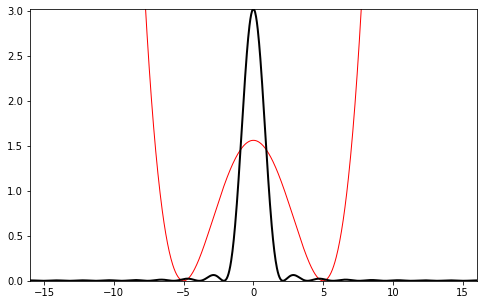

In [12]:
# set up figure and axis for animation
fig, ax = plt.subplots(figsize=(8, 5))
ax.set(xlim=(-a, a), ylim=(0, np.amax(psi2)))

# plot the potential in red, but multiply it by 0.01 so it fits on the same vertical axis scale!
line0 = ax.plot(xvec, 0.01*v(xvec), color='r', lw=1)

# plot the initial |\psi|^2 in black
line = ax.plot(xvec, psi2[0,:], color='k', lw=2)[0]

# plot |\psi(x,t_i)|^2 for each i
def animate(i):
    line.set_ydata(psi2[i,:])

# create the animation
anim = FuncAnimation(fig, animate, interval=100, frames=(nsteps-1))


In [14]:
# show the animation in a Jupyter notebook (requires rendering to HTML5)
# HTML(anim.to_html5_video())

**Adjoint Method**

Now we address the inverse problem: given $\psi(x,t)$ for $t > 0$, how can we determine $\psi(x,0)$ and $v(x)$?

Within the context of our basis function method, knowledge of $\psi(x,t)$ for $t > 0$ is, up to sampling and resolution  requirements, equivalent to knowledge of $\vec{a}(t)$.  To repeat an equation already written above:

$a_m(t) = ( \phi_m, \psi(\cdot, t) )$.

In words, to find $a_m(t)$, we simply take the $L^2$ inner product of the basis function $\phi_m$ with the wave function at time $t$.

Hence we will proceed under the assumption that we have observations $\vec{a}(t)$ on a temporal grid $\{ t_k \}_{k=0}^{F}$ with $t_k = k \Delta t$.  Note that the initial time is zero: $t_0 = 0$.  If the final time is $T$, i.e., $t_F = T$, we have $\Delta t = T/F$. 

As our goal is to find $v(x)$, we revisit this equation: for $-N \leq m, n \leq N$,

$\displaystyle V_{mn} = \frac{1}{2a} \int_{x=-a}^a e^{i \pi (n-m) x/a} v(x) \, dx$.

We define our parameter vector $\theta$ such that

$\displaystyle \theta_j = (\phi_j, v) = (2a)^{-1/2} \int_{x=-a}^a e^{-i \pi j x/a} v(x) \, dx$.

We see that

$(2a)^{-1/2} \theta_{m-n} = V_{mn}$.

Now suppose that $n = -N$.  Then our equation is

$(2a)^{-1/2} \theta_{m + N} = V_{m,-N}$.

We need to evaluate this for $-N \leq m \leq N$, which is equivalent to evaluating $\theta_j$ for $j = 0, \ldots, 2N$.  Suppose that we have access to these values of $\theta_j$.  Then we note that

$\theta_{-j} = \overline{\theta_j}$,

so we also have access to $\theta_j$ for $j = -2N, \ldots, -1$.  The entries $\theta_j$ for $-2N \leq j \leq 2N$ are clearly sufficient to determine all entries $V_{mn}$ of the $V$ matrix.

Hence we will take our parameter vector to be $\theta \in \mathbb{R}^p$ with $p = 2N+1$.

**Notation**

In what follows, we use $\theta$ to denote the *true parameter vector* that one obtains by computing the above Fourier integral for the *true potential energy function* $v(x)$.

We will put a hat on top of a variable to denote a *statistical estimate* of that variable.  This is standard notation in statistics.  So, $\hat{\theta}$ denotes the *estimated parameter vector*, which will in general be different from $\theta$.

Similarly, $\hat{a}(t)$ will denote the *estimated* solution we obtain when we solve the ODE

$\displaystyle \frac{d}{dt} \hat{a}(t) = -i \hat{H} \hat{a}(t)$

using the *estimated* potential matrix $\hat{V}$ in the *estimated* Hamiltonian $\hat{H} = K + \hat{V}$.  Here $\hat{V}$ is determined from $\hat{\theta}$ using $\hat{V}_{mn} = (2a)^{-1/2} \hat{\theta}_{m-n}$, as we discussed above.  Note that I did not put a hat on $K$ because we are not estimating the kinetic energy matrix; we will use the true matrix $K$.

**Objective Function: Direct Method**

In a direct method, we regard $\hat{a}$ as a function of $\hat{\theta}$.  That is, $\hat{\theta}$ determines $\hat{H}$, which influences the solution $\hat{a}$.  Then we define

$\displaystyle J(\hat{\theta}) = \frac{1}{2} \sum_{k=0}^F \| \vec{a}(t_k) - \hat{a}(t_k; \hat{\theta}) \|^2$.

In the direct method, this objective function is *only defined* for $\hat{a}(t)$ that solves the above ODE.  To optimize this objective, we must compute the gradient of $J$ with respect to $\hat{\theta}$.  This will end up depending on $\nabla_{\hat{\theta}} \hat{a}(t; \hat{\theta})$.  We can compute this by differentiating the ODE for $\hat{a}$ with respect to $\hat{\theta}$ on both sides, resulting in:

$\displaystyle \frac{d}{dt} (\nabla_{\hat{\theta}} \hat{a}(t)) = -i (\nabla_{\hat{\theta}} \hat{H}) \hat{a}(t) - i \hat{H} (\nabla_{\hat{\theta}} \hat{a}(t))$.

It is possible but annoying to solve this equation.  We will not pursue this approach.

Another way to compute $\nabla_{\hat{\theta}} \hat{a}(t; \hat{\theta})$ is to differentiate both sides of the exact solution of the ODE,

$\hat{a}(t; \hat{\theta}) = \exp (-i \hat{H} t) \hat{a}(0)$.

This will require understanding $\nabla_{Z} \exp(Z)$, the gradient of the matrix exponential with respect to a matrix input.  We will address this below.

**Objective Function: Adjoint Method**

For notational convenience, in what follows, we will write $\hat{a}_k = \hat{a}(t_k)$ and $\vec{a}_k = \vec{a}(t_k)$.

In the adjoint method, we introduce a Lagrange multiplier $\lambda_k$, of the same dimension as each corresponding state variable $\hat{a}(t_k)$, and write down the Lagrangian

$\displaystyle L(\hat{a}, \lambda, \hat{\theta}) = \frac{1}{2} \sum_{k=0}^F \| \vec{a}_k - \hat{a}_k \|^2 - \Re \sum_{k=0}^{F-1} \lambda_{k+1}^\dagger \biggl( \hat{a}_{k+1} - \exp(-i \hat{H} \Delta t) \hat{a}_k \biggr)$.

The Lagrangian is defined for any $\hat{a}$, $\lambda$, and $\hat{\theta}$ that are of the right dimensions.

We now take gradients.  The gradient with respect to $\lambda$ will reproduce the equality constraint; we omit the details but simply record that

$\displaystyle \nabla_{\lambda_{j+1}} L = \hat{a}_{j+1} - \exp(-i \hat{H} \Delta t) \hat{a}_j$.

Setting this gradient equal to zero will constrain $\hat{a}$ to evolve according to the ODE given above.

We focus our attention on the gradient with respect to $\hat{a}$.  We compute this as follows:

$\displaystyle \delta L = \frac{d}{d \epsilon} \biggr|_{\epsilon=0} L(\hat{a} + \epsilon \delta \hat{a}, \lambda, \hat{\theta})$.

$\displaystyle \delta L = \frac{d}{d \epsilon} \biggr|_{\epsilon=0} \frac{1}{2} \sum_{k=0}^F \| \vec{a}_k - \hat{a}_k - \epsilon \delta \hat{a}_k \|^2 - \Re \sum_{k=0}^{F-1} \lambda_{k+1}^\dagger \biggl( \hat{a}_{k+1} + \epsilon \delta \hat{a}_{k+1} - \exp(-i \hat{H} \Delta t) (\hat{a}_k + \epsilon  \delta \hat{a}_{k}) \biggr)$.

$\displaystyle \delta L = -\frac{1}{2} \sum_{k=0}^F \delta \hat{a}_k^\dagger ( \vec{a}_k - \hat{a}_k ) - \frac{1}{2} \sum_{k=0}^F ( \vec{a}_k - \hat{a}_k )^\dagger (\delta \hat{a}_k) - \Re \sum_{k=0}^{F-1} \lambda_{k+1}^\dagger \biggl( \delta \hat{a}_{k+1} - \exp(-i \hat{H} \Delta t)  \delta \hat{a}_{k} \biggr)$.

The second term is the complex conjugate of the first term, and so we have a combination of the form $(z + \overline{z})/2 = \Re(z)$, the real part of $z$.  Hence

$\displaystyle \delta L = - \Re \left\{ \sum_{k=0}^F ( \vec{a}_k - \hat{a}_k )^\dagger (\delta \hat{a}_k) \right\} - \Re \sum_{k=0}^{F-1} \lambda_{k+1}^\dagger \biggl( \delta \hat{a}_{k+1} - \exp(-i \hat{H} \Delta t)  \delta \hat{a}_{k} \biggr)$.

We separate the terms in the second summation and relabel indices to obtain

$\displaystyle \delta L = - \Re \left\{ \sum_{k=0}^F ( \vec{a}_k - \hat{a}_k )^\dagger (\delta \hat{a}_k) \right\} - \Re \sum_{k=1}^{F} \lambda_{k}^\dagger \delta \hat{a}_{k} + \Re \sum_{k=0}^{F-1} \lambda_{k+1}^\dagger \exp(-i \hat{H} \Delta t)  \delta \hat{a}_{k}$.


Note that there are only two terms with $\delta \hat{a}_F$.  Hence

$\displaystyle \frac{\delta L}{\delta \hat{a}_F} = - ( \vec{a}_F - \hat{a}_F )^\dagger - \lambda_F^\dagger$.

When $k = 1, \ldots, F-1$, we have

$\displaystyle \frac{\delta L}{\delta \hat{a}_k} = - ( \vec{a}_k - \hat{a}_k )^\dagger - \lambda_k^\dagger + \lambda_{k+1}^\dagger \exp(-i \hat{H} \Delta t)$.

Finally, for $k=0$, we have

$\displaystyle \frac{\delta L}{\delta \hat{a}_0} = - ( \vec{a}_0 - \hat{a}_0 )^\dagger + \lambda_1^\dagger \exp(-i \hat{H} \Delta t)$.

Setting these gradients to zero gives us a numerical method to solve for $\lambda_j$.  Setting ${\delta L}/{\delta \hat{a}_F} = 0$, we obtain a *final condition*

$\lambda_F^\dagger = ( \hat{a}_F - \vec{a}_F )^\dagger$.

Then for $k = F-1, \ldots, 1$, we set ${\delta L}/{\delta \hat{a}_k} = 0$ and step *backward in time* to obtain

$\lambda_k^\dagger = ( \hat{a}_k - \vec{a}_k )^\dagger  + \lambda_{k+1}^\dagger \exp(-i \hat{H} \Delta t)$.

At the end of these iterations, we have $\lambda_1$, which enables us to compute ${\delta L}/{\delta \hat{a}_0}$.  We then use this gradient to optimize $\hat{a}_0$.  Note that $\hat{a}_0$ determines the rest of $\hat{a}_k$ (for $k > 0$) thanks to the evolution equation

$\hat{a}_{k+1} = \exp(-i \hat{H} \Delta t) \hat{a}_k$.

We have one final gradient to compute, $\nabla_{\hat{\theta}} L$.  The iterations above yield all the $\lambda_k$'s that we need to evaluate the Lagrangian $L$, so we will obtain this derivative directly.  The only reason to proceed cautiously is that $\hat{\theta}$ is complex.  To avoid any issues with complex differentiation, we will first write

$\hat{\theta} = \hat{\theta}^R + i \hat{\theta}^I$.

When we differentiate and it does not matter whether the derivative is with respect to $\hat{\theta}^R$ or $\hat{\theta}^I$, we will use the notation $\hat{\theta}^{R|I}$.

$\displaystyle \nabla_{\hat{\theta}^{R|I}} L = \sum_{k=0}^{F-1} \lambda_{k+1}^\dagger \nabla_{\hat{\theta}^{R|I}} \exp(-i \hat{H} \Delta t) \hat{a}_k$.

To understand the last expression, we must use indices and expand the vector-matrix-vector multiplication:

$\nabla_{\hat{\theta}^{R|I}} L = \sum_{k=0}^{F-1} \sum_{j,\ell} \lambda^\dagger_{k+1, j} \nabla_{\hat{\theta}^{R|I}} \left[ \exp(-i \hat{H} \Delta t) \right]_{j,\ell} \hat{a}_{k,\ell}$.

We interpret the derivative as:

$\displaystyle \frac{\partial  \left[ \exp(-i \hat{H} \Delta t) \right]_{j,\ell}}{\partial \hat{\theta}_m^{R|I}} =  (-i \Delta t) \sum_{q,r} \frac{\partial  \left[ \exp(Z) \right]_{j,\ell}}{\partial Z_{qr}}  \biggr|_{Z = -i \hat{H} \Delta t}  \frac{\partial \hat{H}_{qr}}{\partial \hat{\theta}_m^{R|I}}$.

Note that

$\hat{H}_{qr} = K_{qr} + \hat{V}_{qr} = K_{qr} + \begin{cases} \hat{\theta}_{q-r} & q \geq r \\ \overline{\hat{\theta}}_{r-q} & q < r. \end{cases}$.

This is where it pays to be careful about real and imaginary parts. We see that

$\displaystyle \frac{\partial \hat{H}_{qr}}{\partial \hat{\theta}_m^R} = \begin{cases} \delta_{q-r,m} & q \geq r \\ \delta_{r-q,m} & q < r. \end{cases}$,

and

$\displaystyle \frac{\partial \hat{H}_{qr}}{\partial \hat{\theta}_m^I} = \begin{cases} i \delta_{q-r,m} & q > r \\ -i \delta_{r-q,m} & q < r. \end{cases}$.

For $m=0$, these are $(2N+1) \times (2N+1)$ matrices that are zero except along the main diagonal, where they have a constant band equal to $1$ (in the real case) or $i$ (in the imaginary case).

For each fixed value of $m \neq 0$, these are $(2N+1) \times (2N+1)$ matrices that are zero except along two diagonals, located $|m|$ entries above and below the main diagonal.  In the real case, the entries are $1$ on both super/sub-diagonals.  In the imaginary case, the entries equal $i$ on the subdiagonal and $-i$ on the superdiagonal.

In [15]:
Xind, Yind = np.meshgrid(np.arange(2*(2*nmax+1)-1),np.arange(2*(2*nmax+1)-1))
indices = np.stack([Xind.flatten(), Yind.flatten()]).T
print(indices.shape)

# # from itertools import product
# # indices2 = np.flip(np.array(list(product(np.arange(2*(2*nmax+1)-1), np.arange(2*(2*nmax+1)-1)))),1)

# pools = [list(np.arange(2*(2*nmax+1)-1)) for i in range(2)]
# result = [[]]
# for pool in pools:
#     result = [x+[y] for x in result for y in pool]
# indices3 = np.flip(np.array(result),1)

# print(np.linalg.norm(indices-indices3))


(1089, 2)


In [16]:
# this function implements the adjoint method described mathematically above
# it takes as input x, which is a concatenation of the real and imaginary parts of thetahat
# as you can see from the first 5 lines of the function, 
# the real and imaginary part of thetahat *parameterize* the potential matrix "vhatmat"
@jit(nopython=True)
def toeplitz(r, c):
    c = np.asarray(c).ravel()
    r = np.asarray(r).ravel()
    # Form a 1-D array containing a reversed c followed by r[1:] that could be
    # strided to give us toeplitz matrix.
    vals = np.concatenate((c[::-1], r[1:]))
    out_shp = len(c), len(r)
    n = vals.strides[0]
    return np.lib.stride_tricks.as_strided(vals[len(c)-1:], shape=out_shp, strides=(-n, n)).copy()

@jit(nopython=True)
def fone(di, dk, dn, aik, akn):
    return -aik*akn*((dn-dk)*np.exp(di) + (di-dn)*np.exp(dk) + (dk-di)*np.exp(dn))/((di-dk)*(di-dn)*(dk-dn))

@jit(nopython=True)
def fik(di, dn, aik, akn):
    return aik*akn*((-1.0 + di - dn)*np.exp(di) + np.exp(dn))/((di-dn)**2)

@jit(nopython=True)
def fin(di, dk, aik, akn):
    return aik*akn*((-1.0 + di - dk)*np.exp(di) + np.exp(dk))/((di-dk)**2)

@jit(nopython=True)
def fkn(di, dk, aik, akn):
    return -aik*akn*(-np.exp(di) + (1.0 + di - dk)*np.exp(dk))/((di-dk)**2)

@jit(nopython=True)
def fikn(di, aik, akn):
    return 0.5*aik*akn*np.exp(di)

@jit(nopython=True)
def adjhesshelper(x):
    m = 2*nmax + 1
    thetahatR = x[:m]
    thetahatI = np.copy(x[(m-1):])
    thetahatI[0] = 0.0
    thetahat = thetahatR + 1j*thetahatI
    vhatmat = toeplitz(r=thetahat,c=np.conj(thetahat))
    
    # Hamiltonian matrix 
    hhatmat = kmat + vhatmat
    
    # eigendecomposition and compute propagator
    hatspec, hatstates = np.linalg.eigh(hhatmat)
    hatprop = hatstates @ np.diag(np.exp(-1j*hatspec*dt)) @ np.conj(hatstates.T)
    hatpropH = hatstates @ np.diag(np.exp(1j*hatspec*dt)) @ np.conj(hatstates.T)
    
    # propagate the "a" vector of coefficients forward in time
    # in other words, solve the *forward* problem
    ahatmat = np.zeros((nsteps+1, 2*nmax+1), dtype=np.complex128)
    ahatmat[0,:] = np.copy(ainit)
    for j in range(nsteps):
        ahatmat[j+1,:] = hatprop @ ahatmat[j,:]
    
    # propagate the "lambda" vector of coefficients backward in time
    # in other words, solve the *adjoint* problem
    lambmat = np.zeros((nsteps+1, 2*nmax+1), dtype=np.complex128)
    lambmat[nsteps,:] = ahatmat[nsteps,:] - amat[nsteps,:] 
    for j in range(nsteps-1,0,-1):
        lambmat[j,:] = ahatmat[j,:] - amat[j,:] + hatpropH @ lambmat[j+1,:] 
    
    # Compute the gradients
    # Most of this stuff is math that computes the directional derivative of the matrix exponential,
    # the part of the derivation above where we see "\partial \exp(Z) / \partial Z \cdot A"
    # for some matrix A.
    # All of this code has been checked against JAX autograd to make sure it is computing gradients correctly.
    # Note that it is much faster than JAX autograd.
    alldmat = np.zeros((2*m-1, m, m), dtype=np.complex128)
    expspec = np.exp(-1j*dt*hatspec)
    mask = np.zeros((m,m), dtype=np.complex128)
    for ii in range(m):
        for jj in range(m):
            if np.abs(hatspec[ii] - hatspec[jj]) < 1e-8:
                mask[ii,ii] = expspec[ii]
            else:
                mask[ii,jj] = (expspec[ii] - expspec[jj])/(-1j*dt*(hatspec[ii]-hatspec[jj]))
    
    derivamat = np.zeros((2*m-1, m, m), dtype=np.complex128)
    for iii in range(m):
        ctrvec = np.zeros(m, dtype=np.complex128)
        ctrvec[iii] = 1.0
        ctrmat = toeplitz(r=ctrvec, c=np.conj(ctrvec))
        derivamat[iii, :, :] = hatstates.conj().T @ ctrmat @ hatstates
        qmat = derivamat[iii, :, :] * mask
        alldmat[iii,:,:] = -1j*dt* hatstates @ qmat @ hatstates.conj().T
    
    for iii in range(m-1):
        ctrvec = np.zeros(m, dtype=np.complex128)
        ctrvec[iii + 1] = 1.0j
        ctrmat = toeplitz(r=ctrvec, c=np.conj(ctrvec))
        derivamat[m + iii, :, :] = hatstates.conj().T @ ctrmat @ hatstates
        qmat = derivamat[m + iii, :, :] * mask
        alldmat[m + iii,:,:] = -1j*dt* hatstates @ qmat @ hatstates.conj().T
    
    ddmat = np.zeros((2*m-1,2*m-1,m,m), dtype=np.complex128)
    hsp = -1j*dt*hatspec
    thishess = np.zeros((2*m-1,2*m-1,m,m), dtype=np.complex128)
    for ii in range(m):
        for nn in range(m):
            result = np.zeros((2*m-1)**2, dtype=np.complex128)
            for kk in range(m):
                if ii==nn:
                    if kk==nn:
                        result += fikn(hsp[ii], derivamat[indices[:,0],ii,kk], derivamat[indices[:,1],kk,nn])
                        result += fikn(hsp[ii], derivamat[indices[:,1],ii,kk], derivamat[indices[:,0],kk,nn])
                    else:
                        result += fin(hsp[ii], hsp[kk], derivamat[indices[:,0],ii,kk], derivamat[indices[:,1],kk,nn])
                        result += fin(hsp[ii], hsp[kk], derivamat[indices[:,1],ii,kk], derivamat[indices[:,0],kk,nn])
                elif kk==nn:
                    result += fkn(hsp[ii], hsp[kk], derivamat[indices[:,0],ii,kk], derivamat[indices[:,1],kk,nn])
                    result += fkn(hsp[ii], hsp[kk], derivamat[indices[:,1],ii,kk], derivamat[indices[:,0],kk,nn])
                elif ii==kk:
                    result += fik(hsp[ii], hsp[nn], derivamat[indices[:,0],ii,kk], derivamat[indices[:,1],kk,nn])
                    result += fik(hsp[ii], hsp[nn], derivamat[indices[:,1],ii,kk], derivamat[indices[:,0],kk,nn])
                else:
                    result += fone(hsp[ii], hsp[kk], hsp[nn], derivamat[indices[:,0],ii,kk], derivamat[indices[:,1],kk,nn])
                    result += fone(hsp[ii], hsp[kk], hsp[nn], derivamat[indices[:,1],ii,kk], derivamat[indices[:,0],kk,nn])
                thishess[:,:,ii,nn] += result #.reshape((2*m-1,2*m-1))
    
    return lambmat, alldmat, ahatmat, hatspec, hatstates, thishess

def adjhess(x):
    lambmat, alldmat, ahatmat, hatspec, hatstates, thishess = adjhesshelper(x)
    
    # compute lagrangian
    resid = ahatmat - amat
    lag = 0.5*np.real(np.sum(np.conj(resid)*resid))
    
    # compute all entries of the gradient at once
    gradients = np.real(np.einsum('ij,ajk,ik->a', np.conj(lambmat[1:,:]), alldmat, ahatmat[:-1,:]))
    
    # propagate \nabla_{\theta} a
    hatprop = hatstates @ np.diag(np.exp(-1j*hatspec*dt)) @ np.conj(hatstates.T)
    hatpropH = hatstates @ np.diag(np.exp(1j*hatspec*dt)) @ np.conj(hatstates.T)
    gradamat = np.zeros((nsteps+1, 2*nmax+1, 4*nmax+1), dtype=np.complex128)
    for j in range(nsteps):
        gradamat[j+1,:,:] = hatprop @ gradamat[j,:,:] + (alldmat @ ahatmat[j,:]).T
    
    # propagate \nabla_{\theta} \lambda
    gradlamb = np.zeros((nsteps+1, 2*nmax+1, 4*nmax+1), dtype=np.complex128)
    gradlamb[nsteps] = np.copy(gradamat[nsteps])
    alldmatH = np.transpose(alldmat.conj(),axes=(2,1,0))
    for j in range(nsteps-1,-1,-1):
        term1 = hatpropH @ gradlamb[j+1,:,:]
        term2 = np.einsum('ijk,j->ik', alldmatH, lambmat[j+1,:])
        gradlamb[j,:,:] = gradamat[j,:,:] + term1 + term2
    
    # compute all entries of the Hessian at once
    ddmat = (-dt**2)*np.einsum('ij,abjk,kl->abil',hatstates,thishess,hatstates.conj().T)
    hesspt1 = np.real(np.einsum('ijl,ajk,ik->al', np.conj(gradlamb[1:,:,:]), alldmat, ahatmat[:-1,:]))
    hesspt2 = np.real(np.einsum('ij,ajk,ikl->al', np.conj(lambmat[1:,:]), alldmat, gradamat[:-1,:,:]))
    hesspt3 = np.real(np.einsum('ij,aljk,ik->al', np.conj(lambmat[1:,:]), ddmat, ahatmat[:-1,:]))
    hess = hesspt1 + hesspt2 + hesspt3
    
    return lag, gradients, hess

In [17]:
# grab true theta used to generate training data
truethetaR = np.real(vrow)
truethetaI = np.imag(vrow[1:])
x0 = np.concatenate([truethetaR, truethetaI])
print(x0.shape)

# compute Lagrangian and gradient for true theta
truelag, trueag, truehess = adjhess(x0)

# think of this as a sanity check: when we plug in the true theta,
# - the Lagrangian should be zero, because the objective function should be 0 and the constraint is satisfied, and
# - the gradient of the Lagrangian should be zero
print(truelag)
print(np.linalg.norm(trueag))

(33,)
0.0
0.0


In [18]:
# for the purposes of calling scipy.optimize, we split our adjgrad function into two parts

# this function computes the Lagrangian; it *does not compute* the gradient
@jit(nopython=True)
def justlag(x):
    m = 2*nmax + 1
    thetahatR = x[:m]
    thetahatI = np.copy(x[(m-1):])
    thetahatI[0] = 0.0
    thetahat = thetahatR + 1j*thetahatI
    vhatmat = toeplitz(r=thetahat,c=np.conj(thetahat))
    
    # Hamiltonian matrix 
    hhatmat = kmat + vhatmat
    
    # eigendecomposition and compute propagator
    hatspec, hatstates = np.linalg.eigh(hhatmat)
    hatprop = hatstates @ np.diag(np.exp(-1j*hatspec*dt)) @ np.conj(hatstates.T)
    hatpropH = hatstates @ np.diag(np.exp(1j*hatspec*dt)) @ np.conj(hatstates.T)
    
    # propagate the "a" vector of coefficients as defined above
    ahatmat = np.zeros((nsteps+1, 2*nmax+1), dtype=np.complex128)
    ahatmat[0,:] = np.copy(ainit)
    for j in range(nsteps):
        ahatmat[j+1,:] = hatprop @ ahatmat[j,:]
    
    # compute lagrangian
    resid = ahatmat - amat
    lag = 0.5*np.real(np.sum(np.conj(resid)*resid))
    
    return lag

def justgrad(x):
    lambmat, alldmat, ahatmat, _, _, _ = adjhesshelper(x)
    
    # compute all entries of the gradient at once
    gradients = np.real(np.einsum('ij,ajk,ik->a', np.conj(lambmat[1:,:]), alldmat, ahatmat[:-1,:]))
    return gradients

def justhess(x):
    lambmat, alldmat, ahatmat, hatspec, hatstates, thishess = adjhesshelper(x)
    
    # propagate \nabla_{\theta} a
    hatprop = hatstates @ np.diag(np.exp(-1j*hatspec*dt)) @ np.conj(hatstates.T)
    hatpropH = hatstates @ np.diag(np.exp(1j*hatspec*dt)) @ np.conj(hatstates.T)
    gradamat = np.zeros((nsteps+1, 2*nmax+1, 4*nmax+1), dtype=np.complex128)
    for j in range(nsteps):
        gradamat[j+1,:,:] = hatprop @ gradamat[j,:,:] + (alldmat @ ahatmat[j,:]).T
    
    # propagate \nabla_{\theta} \lambda
    gradlamb = np.zeros((nsteps+1, 2*nmax+1, 4*nmax+1), dtype=np.complex128)
    gradlamb[nsteps] = np.copy(gradamat[nsteps])
    alldmatH = np.transpose(alldmat.conj(),axes=(2,1,0))
    for j in range(nsteps-1,-1,-1):
        term1 = hatpropH @ gradlamb[j+1,:,:]
        term2 = np.einsum('ijk,j->ik', alldmatH, lambmat[j+1,:])
        gradlamb[j,:,:] = gradamat[j,:,:] + term1 + term2
    
    # compute all entries of the Hessian at once
    ddmat = (-dt**2)*np.einsum('ij,abjk,kl->abil',hatstates,thishess,hatstates.conj().T)
    hesspt1 = np.real(np.einsum('ijl,ajk,ik->al', np.conj(gradlamb[1:,:,:]), alldmat, ahatmat[:-1,:]))
    hesspt2 = np.real(np.einsum('ij,ajk,ikl->al', np.conj(lambmat[1:,:]), alldmat, gradamat[:-1,:,:]))
    hesspt3 = np.real(np.einsum('ij,aljk,ik->al', np.conj(lambmat[1:,:]), ddmat, ahatmat[:-1,:]))
    hess = hesspt1 + hesspt2 + hesspt3
    return hess

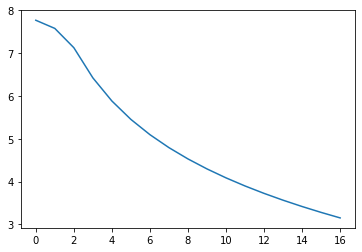

In [19]:
plt.plot(np.arange(2*nmax+1),np.log(np.abs(truethetaR)))

In [20]:
2366*np.exp(-0.4*np.arange(2*nmax+1))*((-1)**np.arange(2*nmax+1))

array([ 2366.        , -1585.97722892,  1063.1123291 ,  -712.62550538,
         477.68716158,  -320.20328014,   214.63867748,  -143.87660817,
          96.44337461,   -64.64792731,    43.33480161,   -29.04818621,
          19.47158152,   -13.05219142,     8.74914555,    -5.86472765,
           3.93124451])

In [21]:
truethetaR

array([ 2366.39101412, -1954.98871841,  1245.64327989,  -615.91900386,
         358.72222688,  -233.218064  ,   163.32983693,  -120.60659728,
          92.64292055,   -73.36438639,    59.52130169,   -49.2503919 ,
          41.42224094,   -35.3203648 ,    30.47265062,   -26.55785283,
          23.35127983])

In [25]:
# as an easy test case, let us take the true theta and perturb it
# with random normally distributed noise (with small variance)
# the optimizer should not have great difficulty converging to a good minimum
# starting from here

x0 = np.concatenate([truethetaR, truethetaI])
x0 += 0.25*np.random.normal(size=x0.shape)

# minlag = np.Inf
# for j in range(5000):
#     x0 = np.zeros((4*nmax+1))
#     amp = np.random.normal()*2000
#     decay = np.random.uniform()
#     x0[:(2*nmax+1)] = amp*np.exp(-decay*np.arange(2*nmax+1)**(0.5))*((-1)**np.arange(2*nmax+1))
#     thislag = justlag(x0)
#     if thislag < minlag:
#         minlag = thislag
#         goodx0 = np.copy(x0)
        
# print(minlag)
# print(np.linalg.norm(x0[:(2*nmax+1)] - truethetaR))

In [26]:
# itx = np.copy(goodx0)
# ind = 0
# lr = 1e-3
# for i in range(100):
#     nab = justgrad(itx)
#     itx[ind] -= lr*nab[ind]
#     print(justlag(itx))
#     ind += 1
#     if ind==itx.shape[0]:
#         ind = 0

In [27]:
res = scipy.optimize.minimize(justlag, x0, method='trust-constr', hess=justhess, jac=justgrad, 
                              options={'verbose': 3, 'maxiter': 1000}) 

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  | penalty  |CG stop|
|-------|-------|-------|-------------|----------|----------|----------|----------|-------|
|   1   |   1   |   0   | +9.6166e+01 | 1.00e+00 | 8.05e+02 | 0.00e+00 | 1.00e+00 |   0   |
|   2   |   2   |   6   | +1.3461e+01 | 2.00e+00 | 4.83e+01 | 0.00e+00 | 1.00e+00 |   2   |
|   3   |   3   |  20   | +1.3461e+01 | 1.00e+00 | 4.83e+01 | 0.00e+00 | 1.00e+00 |   2   |
|   4   |   4   |  31   | +5.6522e+00 | 2.00e+00 | 1.19e+02 | 0.00e+00 | 1.00e+00 |   2   |
|   5   |   5   |  38   | +5.6522e+00 | 5.37e-01 | 1.19e+02 | 0.00e+00 | 1.00e+00 |   3   |
|   6   |   6   |  45   | +4.7248e+00 | 5.37e-01 | 3.88e+01 | 0.00e+00 | 1.00e+00 |   3   |
|   7   |   7   |  74   | +4.2191e-01 | 3.76e+00 | 7.76e+00 | 0.00e+00 | 1.00e+00 |   2   |
|   8   |   8   |  87   | +1.5017e-01 | 3.76e+00 | 1.24e+01 | 0.00e+00 | 1.00e+00 |   4   |
|   9   |   9   |  92   | +2.9357e-02 | 3.76e+00 | 1.44e-01 | 0.00e+00 | 1.00e+0

|  89   |  89   | 1772  | +1.7021e-05 | 3.76e+00 | 1.85e-04 | 0.00e+00 | 1.00e+00 |   4   |
|  90   |  90   | 1805  | +1.4322e-05 | 3.76e+00 | 1.28e-02 | 0.00e+00 | 1.00e+00 |   1   |
|  91   |  91   | 1808  | +1.3540e-05 | 3.76e+00 | 1.50e-03 | 0.00e+00 | 1.00e+00 |   4   |
|  92   |  92   | 1814  | +1.2870e-05 | 3.76e+00 | 4.94e-04 | 0.00e+00 | 1.00e+00 |   4   |
|  93   |  93   | 1847  | +1.2506e-05 | 3.76e+00 | 1.08e-04 | 0.00e+00 | 1.00e+00 |   1   |
|  94   |  94   | 1880  | +1.2174e-05 | 3.76e+00 | 8.42e-04 | 0.00e+00 | 1.00e+00 |   1   |
|  95   |  95   | 1887  | +1.2111e-05 | 3.76e+00 | 1.31e-04 | 0.00e+00 | 1.00e+00 |   4   |
|  96   |  96   | 1920  | +1.1842e-05 | 3.76e+00 | 2.36e-04 | 0.00e+00 | 1.00e+00 |   1   |
|  97   |  97   | 1953  | +1.1595e-05 | 3.76e+00 | 2.20e-04 | 0.00e+00 | 1.00e+00 |   1   |
|  98   |  98   | 1986  | +1.1379e-05 | 3.76e+00 | 1.31e-04 | 0.00e+00 | 1.00e+00 |   1   |
|  99   |  99   | 2019  | +1.1161e-05 | 3.76e+00 | 1.27e-03 | 0.00e+00 | 1.00e+0

|  179  |  179  | 3955  | +7.2459e-06 | 3.76e+00 | 6.79e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  180  |  180  | 3988  | +7.2183e-06 | 3.76e+00 | 2.44e-03 | 0.00e+00 | 1.00e+00 |   1   |
|  181  |  181  | 3989  | +7.2177e-06 | 3.76e+00 | 1.30e-04 | 0.00e+00 | 1.00e+00 |   4   |
|  182  |  182  | 4022  | +7.1903e-06 | 3.76e+00 | 1.73e-04 | 0.00e+00 | 1.00e+00 |   1   |
|  183  |  183  | 4025  | +7.1895e-06 | 3.76e+00 | 4.25e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  184  |  184  | 4058  | +7.1614e-06 | 3.76e+00 | 1.62e-04 | 0.00e+00 | 1.00e+00 |   1   |
|  185  |  185  | 4070  | +7.1510e-06 | 3.76e+00 | 3.22e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  186  |  186  | 4103  | +7.1275e-06 | 3.76e+00 | 6.01e-04 | 0.00e+00 | 1.00e+00 |   1   |
|  187  |  187  | 4104  | +7.1275e-06 | 3.76e+00 | 5.89e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  188  |  188  | 4137  | +7.1041e-06 | 3.76e+00 | 4.53e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  189  |  189  | 4170  | +7.0810e-06 | 3.76e+00 | 8.09e-05 | 0.00e+00 | 1.00e+0

|  269  |  269  | 6033  | +3.4334e-06 | 3.76e+00 | 1.67e-04 | 0.00e+00 | 1.00e+00 |   4   |
|  270  |  270  | 6040  | +3.4290e-06 | 3.76e+00 | 3.98e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  271  |  271  | 6073  | +3.4137e-06 | 3.76e+00 | 2.53e-04 | 0.00e+00 | 1.00e+00 |   1   |
|  272  |  272  | 6078  | +3.4081e-06 | 3.76e+00 | 6.71e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  273  |  273  | 6087  | +3.4074e-06 | 3.76e+00 | 1.68e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  274  |  274  | 6120  | +3.3946e-06 | 3.76e+00 | 8.97e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  275  |  275  | 6130  | +3.3911e-06 | 3.76e+00 | 2.30e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  276  |  276  | 6163  | +3.3807e-06 | 3.76e+00 | 4.05e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  277  |  277  | 6196  | +3.3703e-06 | 3.76e+00 | 2.13e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  278  |  278  | 6229  | +3.3605e-06 | 3.76e+00 | 1.60e-03 | 0.00e+00 | 1.00e+00 |   1   |
|  279  |  279  | 6230  | +3.3602e-06 | 3.76e+00 | 7.59e-05 | 0.00e+00 | 1.00e+0

|  359  |  359  | 8105  | +2.8280e-06 | 3.76e+00 | 1.79e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  360  |  360  | 8138  | +2.7939e-06 | 3.76e+00 | 1.82e-04 | 0.00e+00 | 1.00e+00 |   1   |
|  361  |  361  | 8145  | +2.7738e-06 | 3.76e+00 | 4.09e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  362  |  362  | 8163  | +2.7617e-06 | 3.76e+00 | 1.09e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  363  |  363  | 8196  | +2.7304e-06 | 3.76e+00 | 4.03e-04 | 0.00e+00 | 1.00e+00 |   1   |
|  364  |  364  | 8197  | +2.7304e-06 | 3.76e+00 | 5.47e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  365  |  365  | 8230  | +2.6998e-06 | 3.76e+00 | 3.36e-04 | 0.00e+00 | 1.00e+00 |   1   |
|  366  |  366  | 8231  | +2.6997e-06 | 3.76e+00 | 1.01e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  367  |  367  | 8264  | +2.6691e-06 | 3.76e+00 | 5.34e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  368  |  368  | 8292  | +2.6393e-06 | 3.76e+00 | 1.95e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  369  |  369  | 8325  | +2.1552e-06 | 3.76e+00 | 3.99e-04 | 0.00e+00 | 1.00e+0

|  449  |  449  | 9798  | +1.1050e-06 | 3.76e+00 | 1.97e-04 | 0.00e+00 | 1.00e+00 |   1   |
|  450  |  450  | 9799  | +1.1050e-06 | 3.76e+00 | 4.85e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  451  |  451  | 9808  | +1.1049e-06 | 3.76e+00 | 8.72e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  452  |  452  | 9841  | +1.0879e-06 | 3.76e+00 | 7.15e-04 | 0.00e+00 | 1.00e+00 |   1   |
|  453  |  453  | 9847  | +1.0789e-06 | 3.76e+00 | 1.81e-04 | 0.00e+00 | 1.00e+00 |   4   |
|  454  |  454  | 9854  | +1.0722e-06 | 3.76e+00 | 2.91e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  455  |  455  | 9857  | +1.0721e-06 | 3.76e+00 | 5.28e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  456  |  456  | 9890  | +1.0710e-06 | 3.76e+00 | 7.62e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  457  |  457  | 9892  | +1.0706e-06 | 3.76e+00 | 2.09e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  458  |  458  | 9925  | +1.0698e-06 | 3.76e+00 | 2.97e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  459  |  459  | 9928  | +1.0698e-06 | 3.76e+00 | 8.00e-06 | 0.00e+00 | 1.00e+0

|  539  |  539  | 11225 | +9.5443e-07 | 3.76e+00 | 7.24e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  540  |  540  | 11258 | +9.5307e-07 | 3.76e+00 | 6.25e-06 | 0.00e+00 | 1.00e+00 |   1   |
|  541  |  541  | 11291 | +9.5241e-07 | 3.76e+00 | 8.17e-04 | 0.00e+00 | 1.00e+00 |   1   |
|  542  |  542  | 11292 | +9.5235e-07 | 3.76e+00 | 1.02e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  543  |  543  | 11325 | +9.5174e-07 | 3.76e+00 | 5.32e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  544  |  544  | 11326 | +9.5172e-07 | 3.76e+00 | 1.11e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  545  |  545  | 11359 | +9.5113e-07 | 3.76e+00 | 1.94e-04 | 0.00e+00 | 1.00e+00 |   1   |
|  546  |  546  | 11360 | +9.5113e-07 | 3.76e+00 | 9.94e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  547  |  547  | 11393 | +9.5046e-07 | 3.76e+00 | 3.93e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  548  |  548  | 11396 | +9.5037e-07 | 3.76e+00 | 6.75e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  549  |  549  | 11429 | +9.4842e-07 | 3.76e+00 | 1.89e-03 | 0.00e+00 | 1.00e+0

|  629  |  629  | 12831 | +5.4247e-07 | 3.76e+00 | 4.12e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  630  |  630  | 12864 | +5.4198e-07 | 3.76e+00 | 2.42e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  631  |  631  | 12867 | +5.4197e-07 | 3.76e+00 | 3.74e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  632  |  632  | 12900 | +5.4150e-07 | 3.76e+00 | 3.36e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  633  |  633  | 12903 | +5.4144e-07 | 3.76e+00 | 4.64e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  634  |  634  | 12936 | +5.4108e-07 | 3.76e+00 | 1.11e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  635  |  635  | 12947 | +5.4096e-07 | 3.76e+00 | 4.74e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  636  |  636  | 12980 | +5.3921e-07 | 3.76e+00 | 1.18e-04 | 0.00e+00 | 1.00e+00 |   1   |
|  637  |  637  | 12983 | +5.3840e-07 | 3.76e+00 | 2.13e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  638  |  638  | 13000 | +5.3767e-07 | 3.76e+00 | 5.46e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  639  |  639  | 13033 | +5.3648e-07 | 3.76e+00 | 9.28e-05 | 0.00e+00 | 1.00e+0

|  719  |  719  | 14561 | +2.6438e-07 | 3.76e+00 | 3.04e-05 | 0.00e+00 | 1.00e+00 |   4   |
|  720  |  720  | 14575 | +2.5678e-07 | 3.76e+00 | 9.85e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  721  |  721  | 14598 | +2.5659e-07 | 3.76e+00 | 2.33e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  722  |  722  | 14631 | +2.5591e-07 | 3.76e+00 | 1.60e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  723  |  723  | 14648 | +2.5530e-07 | 3.76e+00 | 1.46e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  724  |  724  | 14681 | +2.5507e-07 | 3.76e+00 | 3.57e-06 | 0.00e+00 | 1.00e+00 |   1   |
|  725  |  725  | 14714 | +2.5485e-07 | 3.76e+00 | 2.33e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  726  |  726  | 14715 | +2.5485e-07 | 3.76e+00 | 4.86e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  727  |  727  | 14748 | +2.5461e-07 | 3.76e+00 | 1.32e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  728  |  728  | 14751 | +2.5460e-07 | 3.76e+00 | 3.45e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  729  |  729  | 14784 | +2.5437e-07 | 3.76e+00 | 1.49e-05 | 0.00e+00 | 1.00e+0

|  809  |  809  | 16489 | +2.0234e-07 | 3.76e+00 | 1.05e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  810  |  810  | 16522 | +2.0193e-07 | 3.76e+00 | 3.65e-06 | 0.00e+00 | 1.00e+00 |   1   |
|  811  |  811  | 16555 | +2.0153e-07 | 3.76e+00 | 4.28e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  812  |  812  | 16556 | +2.0153e-07 | 3.76e+00 | 3.79e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  813  |  813  | 16589 | +2.0116e-07 | 3.76e+00 | 1.55e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  814  |  814  | 16604 | +2.0082e-07 | 3.76e+00 | 9.40e-07 | 0.00e+00 | 1.00e+00 |   4   |
|  815  |  815  | 16637 | +1.9993e-07 | 3.76e+00 | 1.63e-04 | 0.00e+00 | 1.00e+00 |   1   |
|  816  |  816  | 16638 | +1.9992e-07 | 3.76e+00 | 8.48e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  817  |  817  | 16655 | +1.9915e-07 | 3.76e+00 | 1.40e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  818  |  818  | 16688 | +1.9898e-07 | 3.76e+00 | 1.17e-06 | 0.00e+00 | 1.00e+00 |   1   |
|  819  |  819  | 16721 | +1.9883e-07 | 3.76e+00 | 2.17e-05 | 0.00e+00 | 1.00e+0

|  899  |  899  | 18335 | +1.7759e-07 | 3.76e+00 | 3.37e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  900  |  900  | 18337 | +1.7755e-07 | 3.76e+00 | 8.28e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  901  |  901  | 18363 | +1.7736e-07 | 3.76e+00 | 1.20e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  902  |  902  | 18396 | +1.7712e-07 | 3.76e+00 | 3.96e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  903  |  903  | 18397 | +1.7712e-07 | 3.76e+00 | 8.13e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  904  |  904  | 18414 | +1.7693e-07 | 3.76e+00 | 1.32e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  905  |  905  | 18447 | +1.7684e-07 | 3.76e+00 | 3.67e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  906  |  906  | 18448 | +1.7684e-07 | 3.76e+00 | 1.13e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  907  |  907  | 18481 | +1.7675e-07 | 3.76e+00 | 3.56e-06 | 0.00e+00 | 1.00e+00 |   1   |
|  908  |  908  | 18514 | +1.7667e-07 | 3.76e+00 | 1.04e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  909  |  909  | 18515 | +1.7667e-07 | 3.76e+00 | 3.87e-06 | 0.00e+00 | 1.00e+0

|  989  |  989  | 20267 | +1.2872e-07 | 3.76e+00 | 1.52e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  990  |  990  | 20280 | +1.2743e-07 | 3.76e+00 | 4.97e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  991  |  991  | 20291 | +1.2743e-07 | 3.76e+00 | 1.15e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  992  |  992  | 20324 | +1.2728e-07 | 3.76e+00 | 6.87e-05 | 0.00e+00 | 1.00e+00 |   1   |
|  993  |  993  | 20325 | +1.2728e-07 | 3.76e+00 | 1.52e-06 | 0.00e+00 | 1.00e+00 |   4   |
|  994  |  994  | 20358 | +1.2713e-07 | 3.76e+00 | 1.42e-06 | 0.00e+00 | 1.00e+00 |   1   |
|  995  |  995  | 20391 | +1.2701e-07 | 3.76e+00 | 1.78e-06 | 0.00e+00 | 1.00e+00 |   1   |
|  996  |  996  | 20405 | +1.2691e-07 | 3.76e+00 | 8.89e-07 | 0.00e+00 | 1.00e+00 |   4   |
|  997  |  997  | 20438 | +1.2674e-07 | 3.76e+00 | 2.47e-06 | 0.00e+00 | 1.00e+00 |   1   |
|  998  |  998  | 20471 | +1.2656e-07 | 3.76e+00 | 7.49e-06 | 0.00e+00 | 1.00e+00 |   1   |
|  999  |  999  | 20472 | +1.2656e-07 | 3.76e+00 | 2.00e-06 | 0.00e+00 | 1.00e+0

In [28]:
import pickle

In [ ]:
with open('result.pickle', 'wb') as handle:
    pickle.dump(res, handle)

In [29]:
np.savez('resx.npz',res.x)

In [ ]:
# print out the value of the Lagrangian at the thetahad found by the optimizer
print(justlag(res.x))

# has the optimizer found a thetahat that is close to the true theta?
print(np.linalg.norm(res.x - np.concatenate([truethetaR, truethetaI])))

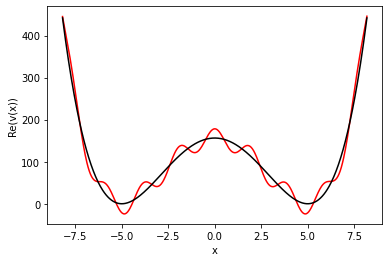

In [30]:
# plot the estimated potential
mm = 2*nmax+1
thetahat = np.zeros(mm, dtype=np.complex128)
thetahat += res.x[:mm]
thetahat[1:] += 1j*res.x[mm:]
nvec2 = np.arange(-2*nmax,2*nmax+1)
convmat2 = np.exp(1j*np.pi*np.outer(nvec2, xvec)/a)
fullthetahat = np.concatenate([np.flipud(thetahat[1:].conj()), thetahat])
vx = fullthetahat @ convmat2

# real part
# red = learned potential
# black = true potential
trim = 250
plt.plot(xvec[trim:-trim], np.real(vx)[trim:-trim], color='red')
plt.plot(xvec[trim:-trim], np.real(v(xvec))[trim:-trim], color='black')
plt.xlabel('x')
plt.ylabel('Re(v(x))')
plt.savefig('adjrecon.pdf')
plt.show()

In [ ]:
# real part
# red = learned potential
# black = true potential
trim = 250
plt.plot(xvec[trim:-trim], np.real(vx)[trim:-trim] - np.real(v(xvec))[trim:-trim], color='black')
plt.xlabel('x')
plt.ylabel('difference in real parts')
plt.show()

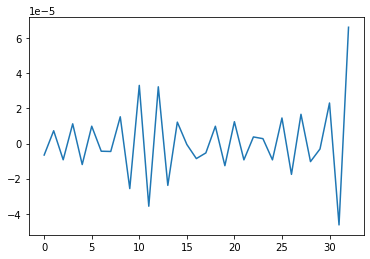

In [31]:
truethetavec = np.concatenate([truethetaR, truethetaI])
plt.plot( (truethetavec - res.x) / np.linalg.norm( truethetavec ) )
plt.show()

In [ ]:
# imaginary part
# red = learned potential
# black = true potential
plt.plot(xvec, np.imag(vx), color='red')
plt.plot(xvec, np.imag(v(xvec)), color='black')
plt.xlabel('x')
plt.ylabel('Im(v(x))')
plt.show()

In [32]:
# start from uniform random initial condition (uniform on [-0.5, 0.5])
# should be difficult for optimizer to find a good minimum starting from here,
# so this is a great test case to prove the method works well
thetahatR = np.random.uniform(size=2*nmax+1) - 0.5
thetahatI = np.random.uniform(size=2*nmax) - 0.5
x0 = np.concatenate([thetahatR, thetahatI])
res = scipy.optimize.minimize(justlag, x0, method='bfgs', jac=justgrad, 
                              options={'gtol':1e-10, 'iprint':99, 'disp': True})

<ipython-input-32-35f5786e2736>:7: OptimizeWarning: Unknown solver options: iprint
  res = scipy.optimize.minimize(justlag, x0, method='bfgs', jac=justgrad,


         Current function value: 1164.278720
         Iterations: 178
         Function evaluations: 217
         Gradient evaluations: 203


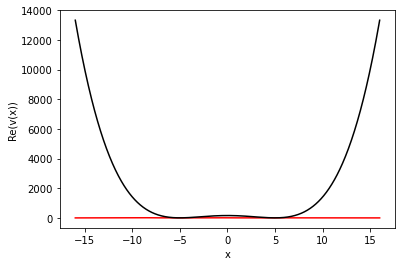

In [33]:
# plot the estimated potential
# so far, this does not look so great

mm = 2*nmax+1
thetahat = np.zeros(mm, dtype=np.complex128)
thetahat += res.x[:mm]
thetahat[1:] += 1j*res.x[mm:]
nvec2 = np.arange(-2*nmax,2*nmax+1)
convmat2 = np.exp(1j*np.pi*np.outer(nvec2, xvec)/a)
fullthetahat = np.concatenate([np.flipud(thetahat[1:].conj()), thetahat])
vx = fullthetahat @ convmat2

# real part
# red = learned potential
# black = true potential
plt.plot(xvec, np.real(vx), color='red')
plt.plot(xvec, np.real(v(xvec)), color='black')
plt.xlabel('x')
plt.ylabel('Re(v(x))')
plt.show()